# 1) Implement the generalized equation for finding the gradient of m-samples, each having n-features. Also, implement the gradient descent approach assuming a constant learning rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m


def h(x, w):        
    val = np.dot(w, x)
    return val

def cost_function(X, w, y):      # defining the cost function.
    r, c = np.shape(X)
    pred_y = np.zeros((r, 1))
    for i in range(r):
        pred_y[i] = h(X[i], w)
    error = np.mean((y - pred_y)**2)/2
    return error

def grad_J(X, y, w):   # calculating gradient of the function at a point.
    r, c = np.shape(X)
    grad = np.zeros(c)
    
    for j in range(c):
        val = 0
        for i in range(r):
            val += (h(X[i], w) - y[i])*X[i][j]
            
        val = val/r
        grad[j] = val
    
    return grad


def Gradient_descent_alpha(X, y, st_point):   # for fixed learning rate i.e. alpha.
    w = st_point
    grad = grad_J(X, y, w)
    eps = 10e-5
    iterates = []
    iterates.append(list(w))
    
    while(pow(np.dot(grad, grad), 0.5) > eps):
        direction = - grad
        alpha = 0.01
        w = w + alpha*direction
        iterates.append(list(w))
        grad = grad_J(X, y, w)
        
    iterates = np.array(iterates)    
    return w, iterates     # returning the optimal weights and list of iteration of weights.

# 2) Using the code developed for problem 1, do the linear regression for the univariate problem using the attached data file univariate_linear_regression.csv. Plot the cost function (both as surface as well as contour) as well as the best fit line. 

The optimal weight vector is : [-8.29633488 16.97260977]
The minimum error is : 0.9774687953076299


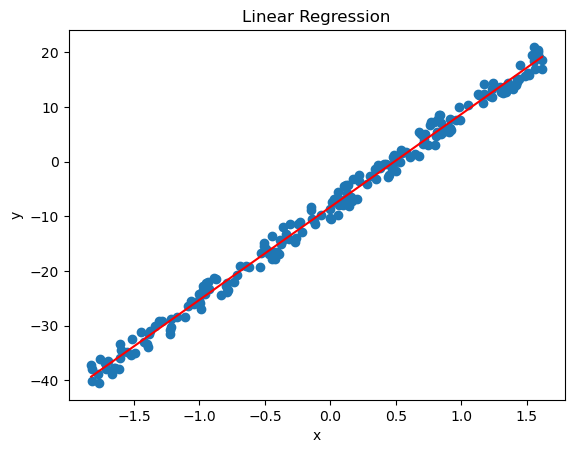

In [2]:
import pandas as pd

data = pd.read_csv('univariate_linear_regression.csv')   # reading the csv file.
#print(data)

x1 = list(data.x)       # feature one column vector.
x1 = np.array(x1)
length = len(x1)
x1 = x1.reshape(length, 1)    

x1 = (x1 - x1.mean())/x1.std()

X = np.ones((length, 1))
X = np.concatenate((X, x1), axis = 1)   # creating the design matrix.
#print(X)

y1 = list(data.y)
y1 = np.array(y1)
y1 = y1.reshape(length, 1)     # ground truth column vector.
#print(y1)

r, c = np.shape(X)
st_point = np.ones(c)
w , iterates = Gradient_descent_alpha(X, y1, st_point)  # calling the gradient descent method to compute 
print(f'The optimal weight vector is : {w}')             # the optimal weight vector.

pred_y = np.zeros((r, 1))
for i in range(r):
    pred_y[i] = h(X[i], w)      # predicting the target value.

#pred_y = np.dot(X, w)
    
error = np.mean((y1 - pred_y)**2)/2
print(f'The minimum error is : {error}')   # computing the error by the optimal weight vector.


# Plot data and Linear regression curve
plt.scatter(x1, y1)

plt.plot(sorted(x1), sorted(pred_y), color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

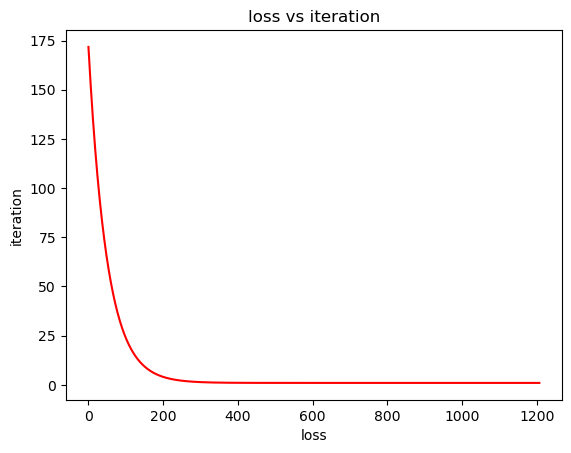

In [3]:
iterates = np.array(iterates)  # array of iteration of weights
length = len(iterates)

iteration = np.array(range(length))
loss = np.zeros(length)
for i in range(length):
    loss[i] = cost_function(X, iterates[i], y1) # computing loss at each iteration of weights.
    
#plotting the cost vs iteration graph.

plt.plot(iteration, loss, color = 'r')
plt.xlabel('loss')
plt.ylabel('iteration')
plt.title('loss vs iteration')
plt.show()

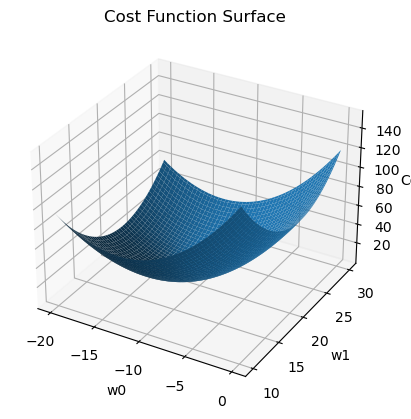

In [4]:
w0_vals = np.linspace(-20, 0, 100)
w1_vals = np.linspace(10, 30, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)  # creating mesh grid of w0 and w1.
J_vals = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = np.array([w0_vals[i], w1_vals[j]])
        J_vals[i, j] = cost_function(X, w, y1)

        
# plotting the cost function surface.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, J_vals)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')
plt.show()

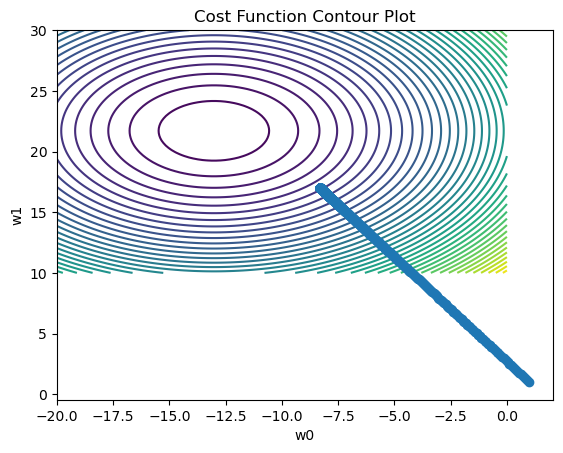

In [5]:
# plotting the cost function contour plot.

plt.contour(W0, W1, J_vals, levels= 40)
plt.plot(iterates[:, 0], iterates[:, 1], 'o-')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Cost Function Contour Plot')
plt.show()

# 3) Using the code developed for problem 1, do the linear regression for the multivariate problem using the attached data file heart.data.csv. Plot the best fit plane for the given data. Can you also interpret the result (taking one independent variable at a time)?

In [203]:
import pandas as pd

data = pd.read_csv('heart.data.csv')   # reading the csv file.
#print(data)

x1 = list(data.biking)
x1_max = max(x1)
x1_min = min(x1)

x1 = np.array(x1)
length = len(x1)
x1 = x1.reshape(length, 1)
x1 = (x1 - x1.mean())/x1.std()  # scaling feature 1 by normalization.


x2 = list(data.smoking)
x2_max = max(x2)
x2_min = min(x2)

x2 = np.array(x2)
length = len(x2)
x2 = x2.reshape(length, 1)
x2 = (x2 - x2.mean())/x2.std() # scaling feature 2 by normalization.

X = np.ones((length, 1))
X = np.concatenate((X, x1), axis = 1)
X = np.concatenate((X, x2), axis = 1)    # creating the design matrix.

y1 = list(data.heart_disease)
y1 = np.array(y1)
y1 = y1.reshape(length, 1)   # ground truth column vector.

In [204]:
r, c = np.shape(X)
st_point = np.zeros(c)
w , iterates = Gradient_descent_alpha(X, y1, st_point)   # calling gradient descent method to compute the optimal weight vector.
print(f'The optimal weight vector is : {w}')

pred_y = np.zeros((r, 1))
for i in range(r):
    pred_y[i] = h(X[i], w)  # predicting the target value.

error = np.mean((y1 - pred_y)**2)/2
print(f'The minimum error is : {error}')   # computing the error by the optimal weight vector.
    

The optimal weight vector is : [10.17444921 -4.29480292  1.47687605]
The minimum error is : 0.21259061846260105


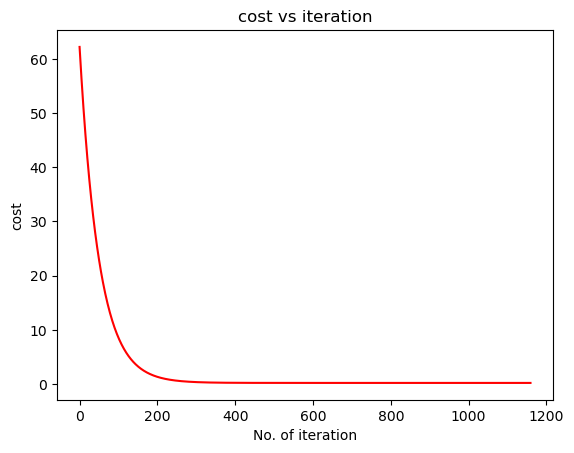

In [205]:
iterates = np.array(iterates)  # array of iteration of weights
length = len(iterates)

iteration = np.array(range(length))
loss = np.zeros(length)
for i in range(length):
    loss[i] = cost_function(X, iterates[i], y1)  # computing loss at each iteration of weights.
    
#plotting the cost vs iteration graph.        
plt.plot(iteration, loss, color = 'r')
plt.xlabel('No. of iteration')
plt.ylabel('cost')
plt.title('cost vs iteration')
plt.show()

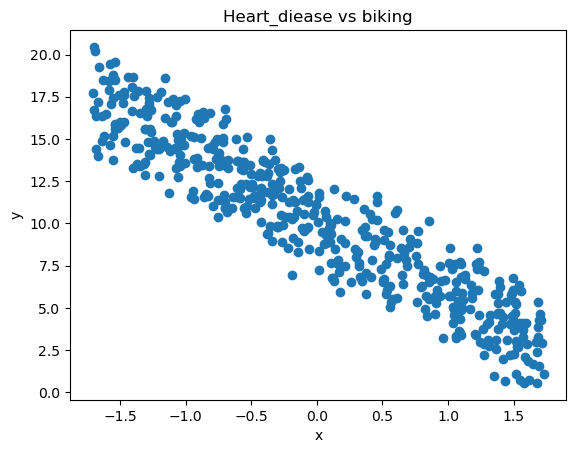

In [206]:
# scatter plotting of Heart_diease vs biking.
plt.scatter(x1, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heart_diease vs biking')
plt.show()

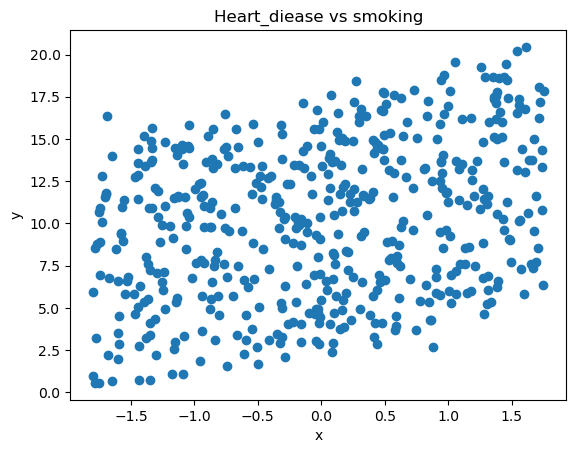

In [207]:
# scatter plotting of Heart_diease vs smoking.
plt.scatter(x2, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heart_diease vs smoking')
plt.show()

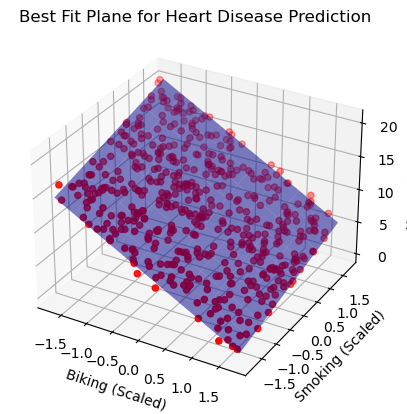

Intercept: 10.1744492083212
Coefficient for Biking: -4.294802923537331
Coefficient for Smoking: 1.476876049445893


In [208]:
# Import libraries
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
intercept, coef_biking, coef_smoking = w.ravel()
# Scatter plot for the data points
ax.scatter(x1, x2, y1, color='red', label='Data Points')

# Create grid coordinates for the plane
x_surf = np.linspace(min(x1), max(x1), 10)
y_surf = np.linspace(min(x2), max(x2), 10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Calculate corresponding z coordinates for the plane
z_surf = intercept + coef_biking * x_surf + coef_smoking * y_surf

# Plot the best fit plane
ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.5, label='Best Fit Plane')

# Set labels and legend
ax.set_xlabel('Biking (Scaled)')
ax.set_ylabel('Smoking (Scaled)')
ax.set_zlabel('Heart Disease')

plt.title('Best Fit Plane for Heart Disease Prediction')
plt.show()

print('Intercept:', intercept)
print('Coefficient for Biking:', coef_biking)
print('Coefficient for Smoking:', coef_smoking)